<a href="https://colab.research.google.com/github/SeongBumKim/Dataanalysis/blob/master/04_pandas_%ED%86%B5%EA%B3%84_seongbum_231025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 설치

In [ ]:
!pip install mySUNI

## 모듈 import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#seaborn data 가져오기
#from mySUNI import cds
from IPython.display import Image

## 데이터셋 로드

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

In [3]:
df.info()
#메타데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# 머신러닝의 학습을 위해서는 numeric (int, float, bool) 만 dtype으로 사용할 수 있다.
# object, category, datetime64, timedelta64 -> 학습용도로 사용하면 안됨.    (형변환)
# Series.astype() -- 타입변경, pd.Categorical() -- 데이터순서변경    (이상치)
# NA, NaN, Null -> 결측치 - 결측치가 포함된 데이터는 학습용도로 사용하면 안됨.    (결측치)
# 이상치(Outlier)

# 머신러닝의 학습 : 수치자료를 사칙연산하거나 함수에 넣어 진행하게됨.
#
# 통계값
# 평균, 중앙값, 최빈값 -- 대표값,
# 분산, 표준편차 -- 데이터의 퍼짐정도(크기는 상황에따라 필요도가 다름)
# Q1, Q2(median), Q3 => IQR -> Outlier
# 정규분포 - 데이터가 평균에 몰려있음,
# 카이제곱분포(범주형-범주끼리의 관계), t-분포(연속형), 지수분포 등

# 통계

**통계**는 데이터 분석에서 굉장히 **중요한 요소**입니다.

데이터에 대한 통계 계산식을 Pandas 함수로 제공하기 때문에 어렵지 않게 통계 값을 산출할 수 있습니다.

## describe() - 요약통계

전반적인 주요 통계를 확인할 수 있습니다.

기본 값으로 **수치형(Numerical) 컬럼**에 대한 통계표를 보여줍니다.

- **count**: 데이터 개수
- **mean**: 평균
- **std**: 표준편차
- **min**: 최솟값
- **max**: 최대값

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# survived, pclass 의 경우 범주형, 의미 없음

**문자열 컬럼에 대한 통계표**도 확인할 수 있습니다.

- **count**: 데이터 개수
- **unique**: 고유 데이터의 값 개수
- **top**: 가장 많이 출현한 데이터 개수
- **freq**: 가장 많이 출현한 데이터의 빈도수

In [ ]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


## count() - 개수

데이터의 개수

In [5]:
# DataFrame 전체의 column 별 개수를 구하는 경우
df.count()
# null값 제외하고 개수 산출
# pandas api 검색하여 설명 참

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [6]:
# 단일 column의 데이터 개수를 구하는 경우 -'age' column의 개수
display(df['age'].count(), df.age.count())

714

714

In [7]:
# 이름규칙은 컬럼명에도 적용해줘야 함.
# naming rule (이름규칙)
# 첫글자는 숫자여서는 안됨
# '_' (under score)를 제외한 특수문자는 사용해서는 안됨
# 한글도 사용가능하지만 영문자 사용

# a123, 키, a_b (사용가능)
# 123, 123a, ab$, ab/() (사용불가)

In [10]:
import pandas as pd

temp = pd.DataFrame({'123':[1,2,3], 'ab(12)':[4,5,6], 'abc':[7,8,9]})
display(temp)

,123,ab(12),abc
0,1,4,7
1,2,5,8
2,3,6,9


In [12]:
temp['123']
# temp.123의 경우 이름규칙을 따르지 않아 에러

SyntaxError: ignored

## mean() - 평균

데이터의 **평균**

In [15]:
# DataFrame 평균 - column별 평균
df.mean(skipna=True)

<ipython-input-15-dc021b63d216>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean(skipna=True)


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [13]:
#numpy의 경우 데이터에 null값이 있을 경우 평균 연산 불가, pandas에서는 가능
arr = np.array([1,2,np.nan,3,4,5])
# arr.mean() # 에러

nan

In [16]:
# Column 평균 - 'age' column의 평균
df.age.mean()

29.69911764705882

### Mean - 조건별 평균

성인 남성의 나이의 평균 구하기

In [19]:
df.adult_male

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: adult_male, Length: 891, dtype: bool

In [20]:
# 성인 남성의 나이의 평균 구하기 'adult_male' 및'age' column 사용
condition = df.adult_male
df.loc[condition, 'age'].mean()



33.17312348668281

### 연습문제

다음 조건을 만족하는 승객의 **나이 평균**과 조건을 만족하는 **데이터의 개수**를 구하세요.

- `fare`를 30 이상 40 미만 지불한 승객
- `pclass`는 1등급

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
# 코드를 입력해 주세요 (데이터 개수 구하기)

# fare를 30 이상 40 미만 지불한 승객
condition1 = (df.fare >= 30) & (df.fare < 40)
# pclass는 1등급
condition2 = (df.pclass == 1)

df.loc[condition1 & condition2, 'age'].count()

21

In [22]:
# 코드를 입력해 주세요 (나이 평균 구하기)
# condition1, condition2 두 조건을 모두 만족하는 승객의 나이 평균을 구하세요.

df.loc[condition1 & condition2, 'age'].mean()

44.095238095238095

### `skipna=True` 옵션

기술 통계 함수에서는 `skipna=True`가 **기본으로 설정** 되어 있습니다.

만약, `skipna=False`로 설정하게 된다면, **NaN 값이 있는 column은 NaN 값으로 출력** 됩니다.

In [ ]:
# skipna=False를 지정한 경우
df.mean(skipna=False)

survived       0.383838
pclass         2.308642
age                 NaN
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [ ]:
# skipna=True를 지정한 경우
df.mean(skipna=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

## median() - 중앙값

데이터의 중앙 값을 출력 합니다. 데이터를 **오름차순 정렬하여 중앙에 위치한 값**입니다.

이상치(outlier)가 존재하는 경우, `mean()`보다 `median()`을 대표값으로 더 **선호**합니다.

In [28]:
pd.Series([1, 2, 3, 4, 5]).median()




3.0

In [25]:
pd.Series([1, 2, 3, 4, 20]).median()

3.0

In [26]:
pd.Series([1, 2, 3, 4, 5]).mean()

3.0

In [27]:
pd.Series([1, 2, 3, 4, 20]).mean()

6.0

In [ ]:
pd.Series([4, 5, 1, 2, 3]).median()

3.0

**짝수**개의 데이터가 있는 경우에는 **가운데 2개 중앙 데이터의 평균 값을 출력** 합니다.

In [ ]:
pd.Series([1, 2, 3, 4, 5, 6]).median()

3.5

나이의 평균(mean)과 중앙값(median)은 약간의 **차이가 있음**을 확인할 수 있습니다.

In [ ]:
print(f"나이 평균: {df['age'].mean():.5f}\n나이 중앙값: {df['age'].median()}\n차이: {df['age'].mean() - df['age'].median():.5f}")

나이 평균: 29.69912
나이 중앙값: 28.0
차이: 1.69912


<Axes: >

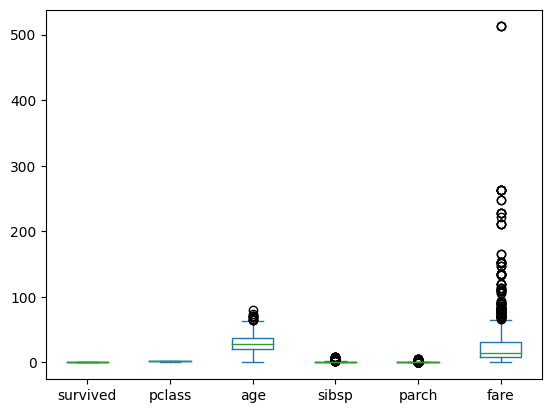

In [30]:
df.plot.box()

## sum() - 합계

데이터의 **합계**입니다. 문자열 column은 모든 데이터가 붙어서 출력될 수 있습니다.

In [33]:
df.sum(numeric_only=True)
# numeric_only를 통해 숫자값에 대한 sum을 출력

survived        342.0000
pclass         2057.0000
age           21205.1700
sibsp           466.0000
parch           340.0000
fare          28693.9493
adult_male      537.0000
alone           537.0000
dtype: float64

단일 column에 대한 **합계 출력**

In [34]:
# 'fare' column에 대한 합계 출력
df.fare.sum()

28693.9493

## cumsum() - 누적합, cumprod() - 누적곱

누적되는 합계를 구할 수 있습니다.

In [35]:
# 'age' column에 대한 누적 합 구하기
df.age.cumsum()

0         22.00
1         60.00
2         86.00
3        121.00
4        156.00
         ...   
886    21128.17
887    21147.17
888         NaN
889    21173.17
890    21205.17
Name: age, Length: 891, dtype: float64

누적되는 곱도 구할 수 있으나, 일반적으로 **값이 너무 커지므로 잘 활용하지는 않습니다.**

In [37]:
# 'age' column에 대한 누적 곱 구하기
df.age.cumprod()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


0            22.0
1           836.0
2         21736.0
3        760760.0
4      26626600.0
          ...    
886           inf
887           inf
888           NaN
889           inf
890           inf
Name: age, Length: 891, dtype: float64

## var() - 분산

$\large 분산 = \Huge\frac{{}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}}{n-1}$

$\large 평균 = \huge \bar{x}$

In [ ]:
# n-1 : 자유도
# 모집단의 자유도 n
# 표본집단의 자유도 n-1

In [47]:
# 평균 (numpy)
fare_mean = df['fare'].values.mean()

# 분산
my_var = ((df['fare'].values - fare_mean) ** 2).sum() / (df['fare'].count() - 1)
my_var

2469.436845743116

In [43]:
# df의 'fare' column에 대한 분산을 함수를 사용해 구해봅니다.
df.fare.var(), df.fare.var(ddof=0)

(2469.436845743116, 2466.665311685043)

In [40]:
x = df['fare'].to_numpy()
type(x), x.var()

(numpy.ndarray, 2466.665311685043)

In [ ]:
# pandas n-1로 나눔
# numpy n으로 나눔
# ndarray : 모집단의 모수구할 때 사용
# Series/DataFrame : 샘플의 통계량 구할 때 사용
# ddof : 자유도, 1로 설정되어있으면 n-1, 0으로 설정되어있으면 n
# 옵션조정을 통해 자유도 조정 가능

## std() - 표준편차

$\large 표준편차 =\huge \sqrt{분산} = \sqrt{\frac{{}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}}{n}}$

분산(var)의 제곱근

In [ ]:
np.sqrt(df['fare'].var())

49.693428597180905

In [49]:
np.sqrt(my_var), my_var ** 0.5

(49.6934285971809, 49.6934285971809)

## min() - 최소값, max() - 최대값

In [ ]:
# 최소값
df['age'].min()

0.42

In [ ]:
# 최대값
df['age'].max()

80.0

## quantile() - 분위

**Quantile이란 주어진 데이터를 동등한 크기로 분할하는 지점**을 말합니다

10%의 경우 0.1을, 80%의 경우 0.8을 대입하여 값을 구합니다.

In [51]:
# 퍼센트의 데이터가 필요할때 사용
# 특정 위치의 값을 산출
s = pd.Series(range(0, 101))
s.quantile([0, 0.25, 0.5, 0.75, 1])

0.00      0.0
0.25     25.0
0.50     50.0
0.75     75.0
1.00    100.0
dtype: float64

In [52]:
s = pd.Series(range(1, 101))
s.quantile([0, 0.25, 0.5, 0.75, 1])

0.00      1.00
0.25     25.75
0.50     50.50
0.75     75.25
1.00    100.00
dtype: float64

In [53]:
s = pd.Series(range(0, 100))
s.quantile([0, 0.25, 0.5, 0.75, 1])

0.00     0.00
0.25    24.75
0.50    49.50
0.75    74.25
1.00    99.00
dtype: float64

In [54]:
# df의 'age' column에 대해 10% quantile을 구해 봅니다.
df.age.quantile(0.1)

14.0

In [55]:
# df의 'age' column에 대해 80% quantile을 구해 봅니다.
df.age.quantile([0.1, 0.8])

0.1    14.0
0.8    41.0
Name: age, dtype: float64

In [57]:
Q1, Q3 = df.age.quantile([0.25, 0.75]) # unpack
print(Q1, Q3)

20.125 38.0


In [58]:
# IQR : Inter quantile range
IQR = Q3 - Q1
print(IQR)

17.875


## unique() - 고유값, nunique() - 고유값 개수

고유값과 고유값의 개수를 구하고자 할 때 사용합니다.

**unique()**

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
#  df의 'who' 컬럼에 대해 고유값을 구해봅니다.
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

**nunique()**: 고유값의 개수를 출력합니다.

In [62]:
# df의 'who' column 에 대한 고유값의 개수를 구해봅니다.
df.who.nunique()

3

In [63]:
df.nunique()  # 1을 갖는 변수는 의미가 없음 -> 1가지 종류

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [ ]:
# 연속형 데이터에 대해서는 : data.var() == 0 인 변수는 의미없음 (기준 설정이 있을 수 있음 ex - 0.8 이하 등)
# 범주형 데이터에 대해서는 : data.ununique() == 1인 변수는 의미없음

## mode() - 최빈값

최빈값은 **가장 많이 출현한 데이터**를 의미합니다.

In [64]:
# df의 'who' column에 대한 최빈값을 구해봅니다.
df.who.mode()

0    man
Name: who, dtype: object

In [66]:
s = pd.Series([1,1,2,2,3,3])
s.mode()

0    1
1    2
2    3
dtype: int64

카테고리형 데이터에도 적용 가능합니다.

In [67]:
# df의 'deck' column에 대한 최빈값을 구해봅니다.
# unique는 유일하게 결측치를 제거하지 않는다.
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## corr() - 상관관계

`corr()`로 컬럼(column)별 **상관관계**를 확인할 수 있습니다.

- **-1~1 사이의 범위**를 가집니다.
- **-1에 가까울 수록 반비례** 관계, **1에 가까울수록 정비례** 관계를 의미합니다.

In [68]:
# df의 각 column 사이의 상관계수를 구합니다.
# 1에 가까울수록 상관관계 있음, 0에 가까울수록 없음.
df.corr()

<ipython-input-68-af9703d2cfb0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


**특정 컬럼에 대한 상관관계**를 확인할 수 있습니다.

In [ ]:
df.corr()['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

In [70]:
df.corr(numeric_only=True)['survived'].to_frame().T

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.0,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.55708,-0.203367


In [ ]:
# < 0.1 선형관계가 전혀 없다.
# < 0.3 선형관계가 약하다
# < 0.7 어느정도 있다
# < 1 강하다(깊은 상관관계가 있다)